In [30]:
# 2 Problem 2 : Data Preprocessing, Analysis, and Visualization for building a Machine learning model
#(https://www.geeksforgeeks.org/data-preprocessing-analysis-and-visualization-for-building-a-machine-learning-model/)

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Churn_Modelling.csv')
df.info() # there are no null found in any columns
df.drop(columns = ['Surname'], inplace = True) # dropping Surname column as it has string values
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(array([5014.,    0.,    0.,    0.,    0., 2477.,    0.,    0.,    0.,
        2509.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

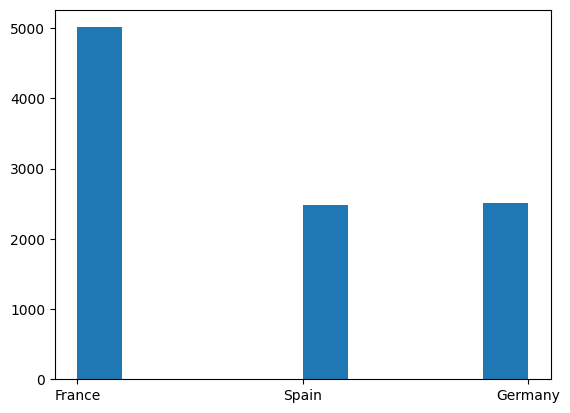

In [13]:
#Bar charts for categorical data
# sns.barplot(x =df['Geography'],y =df['Gender'].value_counts())

plt.hist(df['Geography'], label = df['Geography'].unique())

<ipython-input-15-ae62a70f5b76>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index)
<ipython-input-15-ae62a70f5b76>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-15-ae62a70f5b76>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the 

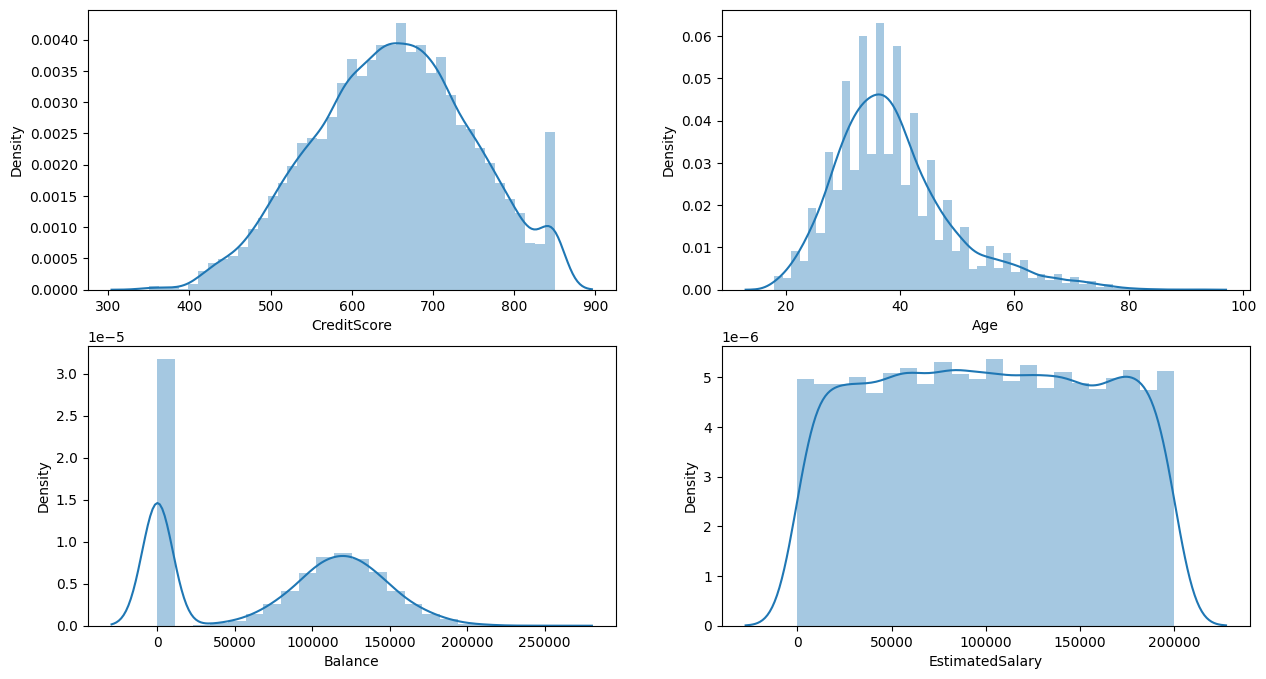

In [15]:
#Histograms
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index = 1

for i in lis:
    plt.subplot(2, 2, index)
    sns.distplot(df[i])
    index += 1

<ipython-input-17-4918125ad30d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, index)


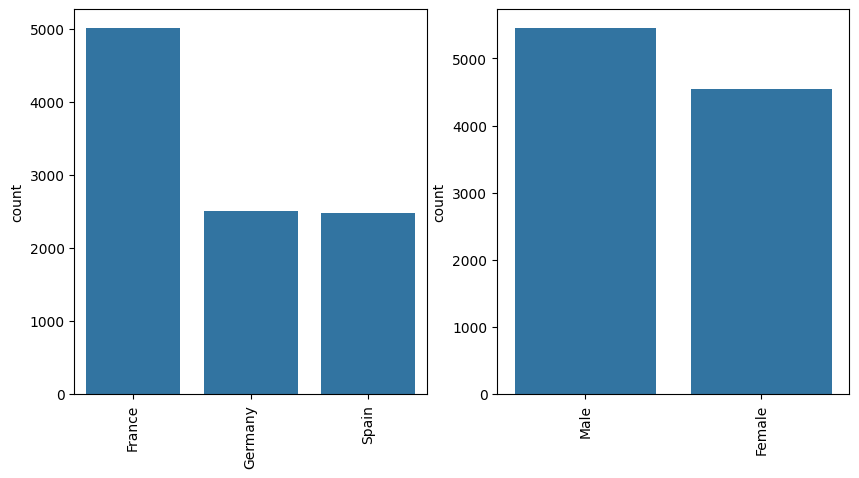

In [17]:
lis2 = ['Geography', 'Gender']
plt.subplots(figsize=(10, 5))
index = 1

for col in lis2:
    y = df[col].value_counts()
    plt.subplot(1, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [18]:
df.isnull().any()

RowNumber          False
CustomerId         False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [32]:


le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

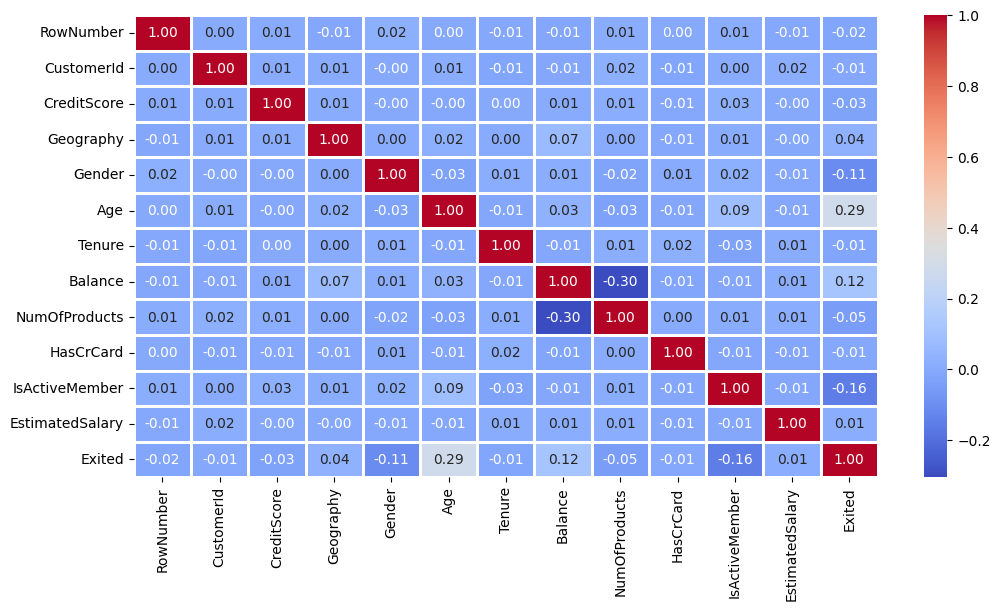

In [33]:
#Correlation between columns

df.corr() #showing coorelation in tabular format

#Heatmap

fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, linewidths=2, fmt='.2f', cmap = 'coolwarm' )


In [36]:
#splitting the data
#feature scaling by normalizing with StandardScaler

x = df.iloc[:,1:12]
y = df.iloc[:, -1]


x_train, x_test, y_train,y_test= train_test_split(x,y, test_size =0.3, random_state = 7)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2312   83]
 [ 463  142]]


0.818